# EDA

Business problem:
- In the event of an accident, what factors contibute to the amount of damage cost

## Imports

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Train_Test_split
from sklearn.model_selection import train_test_split, GridSearchCV

# preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

# Report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

## Load in file

In [20]:
df = pd.read_csv('CLEANDATA/clean_data_N2.csv', index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882247 entries, 0 to 882246
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   LIGHTING_CONDITION         882247 non-null  object
 1   CRASH_TYPE                 882247 non-null  object
 2   DAMAGE                     882247 non-null  object
 3   NUM_UNITS                  882247 non-null  int64 
 4   MOST_SEVERE_INJURY         882247 non-null  object
 5   CRASH_HOUR                 882247 non-null  int64 
 6   CRASH_DAY_OF_WEEK          882247 non-null  int64 
 7   CRASH_MONTH                882247 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   882247 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  882247 non-null  object
 10  TRAFFICWAY_TYPE_N          882247 non-null  object
 11  ROAD_DEFECT_N              882247 non-null  object
 12  ROADWAY_SURFACE_COND_N     882247 non-null  object
 13  FIRST_CRASH_TYPE_N         882247 non-null  

In [21]:
specific_words = ['UNKNOWN']

def find_words_in_column(column, words):
    return column.str.contains('|'.join(words), case=False, na=False)

# Check for specific words in each column
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column is of string type
        mask = find_words_in_column(df[column], specific_words)
        print(f"Column: {column}")
        print(df[mask])  # Display rows containing the words
        
# df[mask].value_counts()

Column: LIGHTING_CONDITION
       LIGHTING_CONDITION                        CRASH_TYPE         DAMAGE  \
18                UNKNOWN            NO INJURY / DRIVE AWAY  $501 - $1,500   
36                UNKNOWN            NO INJURY / DRIVE AWAY    OVER $1,500   
37                UNKNOWN            NO INJURY / DRIVE AWAY    OVER $1,500   
73                UNKNOWN            NO INJURY / DRIVE AWAY    OVER $1,500   
93                UNKNOWN            NO INJURY / DRIVE AWAY  $501 - $1,500   
...                   ...                               ...            ...   
882143            UNKNOWN  INJURY AND / OR TOW DUE TO CRASH    OVER $1,500   
882177            UNKNOWN            NO INJURY / DRIVE AWAY    OVER $1,500   
882183            UNKNOWN            NO INJURY / DRIVE AWAY    OVER $1,500   
882206            UNKNOWN            NO INJURY / DRIVE AWAY    OVER $1,500   
882220            UNKNOWN            NO INJURY / DRIVE AWAY    OVER $1,500   

        NUM_UNITS       MOST_SEVERE_

### Sample

In [22]:
# create a sample of the data to test and work with

df = df.sample(n=16000, random_state=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16000 entries, 597559 to 687717
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   LIGHTING_CONDITION         16000 non-null  object
 1   CRASH_TYPE                 16000 non-null  object
 2   DAMAGE                     16000 non-null  object
 3   NUM_UNITS                  16000 non-null  int64 
 4   MOST_SEVERE_INJURY         16000 non-null  object
 5   CRASH_HOUR                 16000 non-null  int64 
 6   CRASH_DAY_OF_WEEK          16000 non-null  int64 
 7   CRASH_MONTH                16000 non-null  int64 
 8   SEC_CONTRIBUTORY_CAUSE_N   16000 non-null  object
 9   PRIM_CONTRIBUTORY_CAUSE_N  16000 non-null  object
 10  TRAFFICWAY_TYPE_N          16000 non-null  object
 11  ROAD_DEFECT_N              16000 non-null  object
 12  ROADWAY_SURFACE_COND_N     16000 non-null  object
 13  FIRST_CRASH_TYPE_N         16000 non-null  object
 14  WEATH

## Models


### Train-Test Split

In [23]:
X = df.drop('DAMAGE', axis=1)
y = df['DAMAGE']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((11200, 16), (4800, 16))

### Pre-processing

In [25]:
ss = StandardScaler(with_mean=False)
encoder = OneHotEncoder(handle_unknown='ignore')
LE = LabelEncoder()

In [26]:
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [27]:
X_train_scaled = ss.fit_transform(X_train_encoded)
X_test_scaled = ss.transform(X_test_encoded)

In [28]:
y_train_LE = LE.fit_transform(y_train)
y_test_LE = LE.transform(y_test)

### Baseline

* Using DecisionTreeClassifier as my base model because it doesnt need to be scaled and is easy to use in handling categorical features

In [29]:
model_base = DecisionTreeClassifier(random_state=42)
model_base.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [30]:
model_base.score(X_train_scaled, y_train)

0.9950892857142857

In [31]:
model_base.score(X_test_scaled, y_test)

0.51375

In [32]:
y_pred = model_base.predict(X_test_scaled)

In [33]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.19      0.18      0.19       558
$501 - $1,500       0.26      0.28      0.27      1162
  OVER $1,500       0.67      0.66      0.67      3080

     accuracy                           0.51      4800
    macro avg       0.38      0.37      0.37      4800
 weighted avg       0.52      0.51      0.52      4800



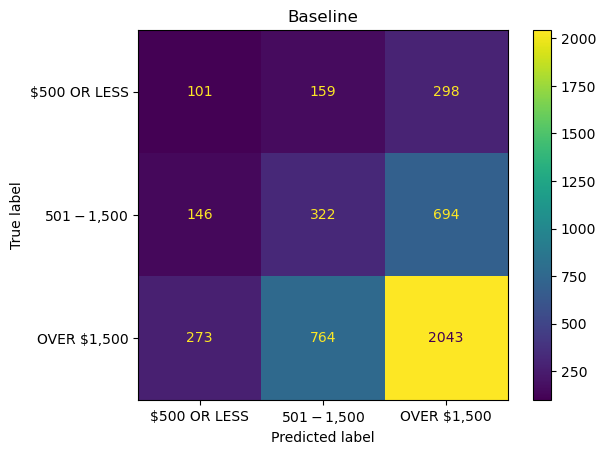

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Baseline')
plt.show()

In [35]:
# Due to overfitting while conducting the training test yeilded a high accuracy score initially, however, after the test on unseen data by the model, the performance dropped

### LogisticRegression

In [36]:
# base

model_LogRegression = LogisticRegression(max_iter=10000, random_state=42)

In [37]:
model_LogRegression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [38]:
model_LogRegression.score(X_train_scaled, y_train)

0.6408035714285715

In [39]:
model_LogRegression.score(X_test_scaled, y_test)

0.64625

In [40]:
y_pred = model_LogRegression.predict(X_test_scaled)

In [41]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.54      0.14      0.23       558
$501 - $1,500       0.36      0.03      0.06      1162
  OVER $1,500       0.66      0.97      0.78      3080

     accuracy                           0.65      4800
    macro avg       0.52      0.38      0.36      4800
 weighted avg       0.57      0.65      0.54      4800



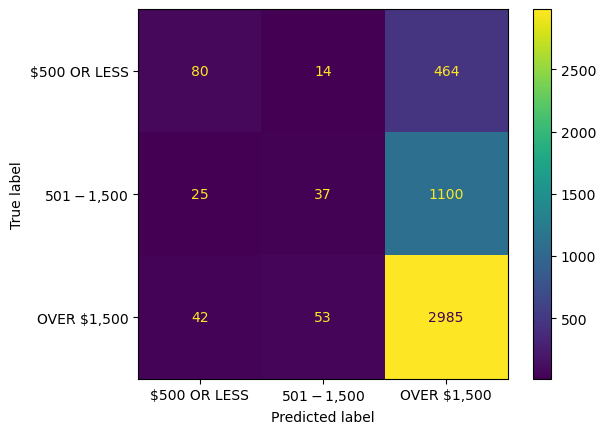

In [42]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---------------------

In [43]:
# Hyperparameter Adjustments

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']  # 'saga' supports both L1 and L2
}

In [44]:
grid_search = GridSearchCV(estimator=model_LogRegression, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)

In [45]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [46]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Score: 0.6375


-----------------

In [47]:
# Hypertuned model

model_LogRegression = LogisticRegression(C=0.01, penalty='l1', solver='saga', max_iter=10000)

In [48]:
model_LogRegression.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, max_iter=10000, penalty='l1', solver='saga')

In [49]:
model_LogRegression.score(X_train_scaled, y_train)

0.6388392857142857

In [50]:
model_LogRegression.score(X_test_scaled, y_test)

0.649375

In [51]:
y_pred = model_LogRegression.predict(X_test_scaled)

In [52]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.54      0.15      0.24       558
$501 - $1,500       0.00      0.00      0.00      1162
  OVER $1,500       0.65      0.98      0.79      3080

     accuracy                           0.65      4800
    macro avg       0.40      0.38      0.34      4800
 weighted avg       0.48      0.65      0.53      4800



/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

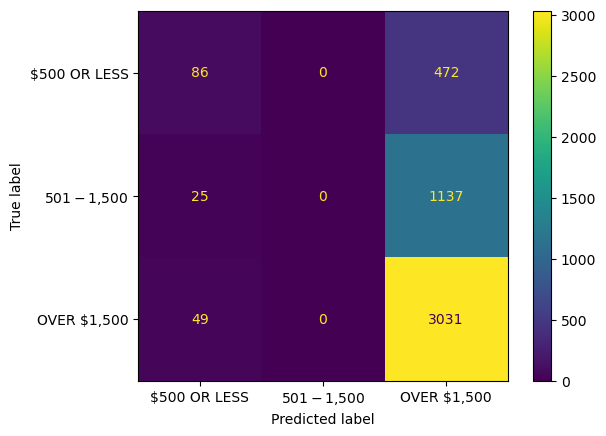

In [53]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

----------------------------

In [54]:
# L2

model_LogRegression = LogisticRegression(C=0.01, penalty='l2', solver='liblinear', max_iter=10000)

In [55]:
model_LogRegression.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, max_iter=10000, solver='liblinear')

In [56]:
model_LogRegression.score(X_train_scaled, y_train)

0.6395535714285714

In [57]:
model_LogRegression.score(X_test_scaled, y_test)

0.646875

In [58]:
y_pred = model_LogRegression.predict(X_test_scaled)

In [59]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.55      0.15      0.23       558
$501 - $1,500       0.35      0.03      0.05      1162
  OVER $1,500       0.66      0.97      0.78      3080

     accuracy                           0.65      4800
    macro avg       0.52      0.38      0.35      4800
 weighted avg       0.57      0.65      0.54      4800



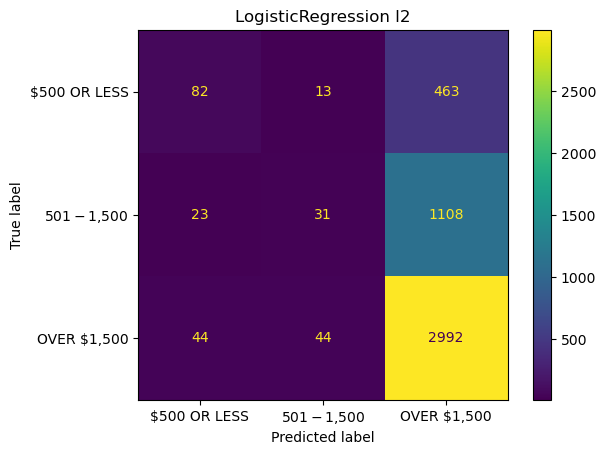

In [60]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('LogisticRegression l2')
plt.show()

The base model of LogisticRegression performed well and the hypertuned model was a slight improvement though not as noticable. 
However, the hypertuned model failed to predict on one of the targets, After changing the penalty and solver, the model predicted on all targets.
All models had 65% accuracy score overall

-----------------------

### DecisionTree

In [61]:
model_Decision = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [62]:
model_Decision.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [63]:
model_Decision.score(X_train_scaled, y_train)

0.9950892857142857

In [64]:
model_Decision.score(X_test_scaled, y_test)

0.5222916666666667

In [65]:
y_pred = model_Decision.predict(X_test_scaled)

In [66]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.20      0.21      0.21       558
$501 - $1,500       0.29      0.31      0.30      1162
  OVER $1,500       0.68      0.66      0.67      3080

     accuracy                           0.52      4800
    macro avg       0.39      0.39      0.39      4800
 weighted avg       0.53      0.52      0.53      4800



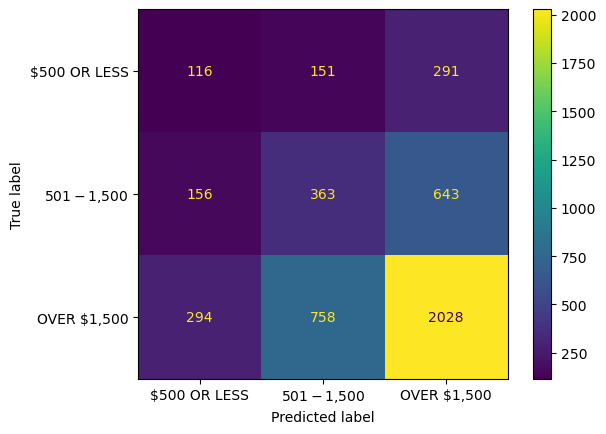

In [67]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

-------------------------

In [68]:
# Hyperparameter adjustment 

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [69]:
model_H = DecisionTreeClassifier()

In [70]:
grid_search = GridSearchCV(estimator=model_H, param_grid=param_grid, cv=5, scoring='accuracy')

In [71]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [72]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Score: 0.6241964285714285


--------------------------

In [73]:
# Hypertuned model

model_Decision = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=2)

In [74]:
model_Decision.fit(X_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)

In [75]:
model_Decision.score(X_train_scaled, y_train)

0.648125

In [76]:
model_Decision.score(X_test_scaled, y_test)

0.6375

In [77]:
y_pred = model_Decision.predict(X_test_scaled)

In [78]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.47      0.15      0.22       558
$501 - $1,500       0.27      0.02      0.04      1162
  OVER $1,500       0.65      0.96      0.78      3080

     accuracy                           0.64      4800
    macro avg       0.46      0.38      0.35      4800
 weighted avg       0.54      0.64      0.53      4800



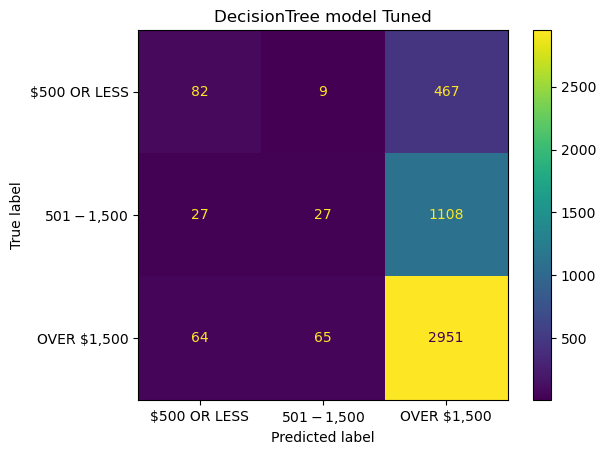

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('DecisionTree model Tuned')
plt.show()

----------------------

### KNN

In [81]:
# Base KNN model

model_KNN = KNeighborsClassifier()

In [82]:
model_KNN.fit(X_train_scaled, y_train)
model_KNN.score(X_train_scaled, y_train)

0.6955357142857143

In [83]:
model_KNN.score(X_test_scaled, y_test)

0.54625

In [84]:
y_pred = model_KNN.predict(X_test_scaled)

In [85]:
print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

 $500 OR LESS       0.22      0.16      0.19       558
$501 - $1,500       0.28      0.29      0.28      1162
  OVER $1,500       0.69      0.71      0.70      3080

     accuracy                           0.55      4800
    macro avg       0.40      0.39      0.39      4800
 weighted avg       0.53      0.55      0.54      4800



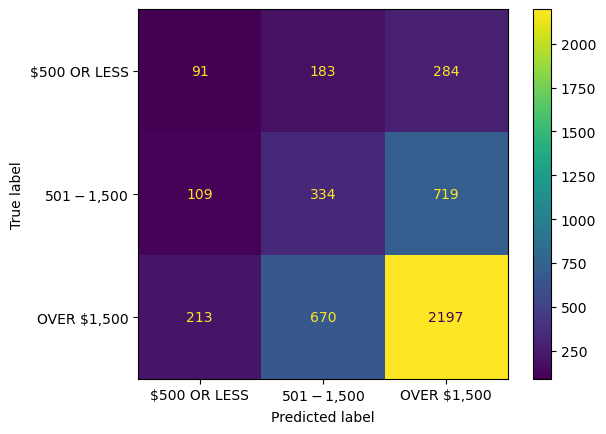

In [86]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

---------------

In [87]:
# Hyperparameter tuning

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 30],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [88]:
grid_search = GridSearchCV(model_KNN, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [89]:
grid_search.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/envs/mylearnenv/lib/python3.12/site-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/opt/anaconda3/en

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [90]:
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 30, 'weights': 'distance'}
Best Cross-Validation Score: 0.6207142857142858


In [91]:
# Hypertuned model

model_KNN = KNeighborsClassifier(metric='euclidean', n_neighbors=30,weights='distance')

In [92]:
model_KNN.fit(X_train_scaled, y_train)
model_KNN.score(X_train_scaled, y_train)

0.9950892857142857

In [93]:
model_KNN.score(X_test_scaled, y_test)

0.6283333333333333

In [94]:
y_pred = model_KNN.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred))

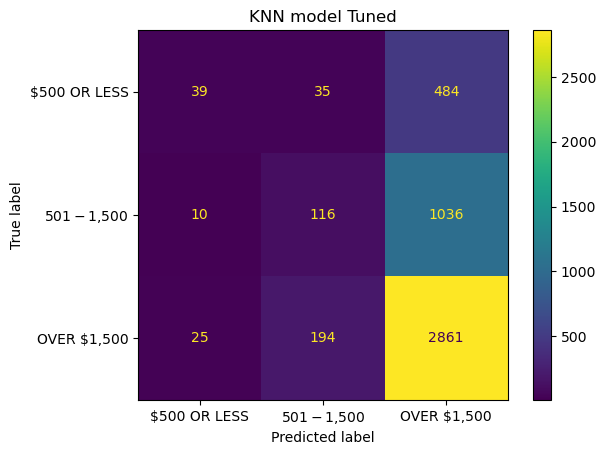

In [95]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('KNN model Tuned')
plt.show()

-------------------

In [96]:
# LabelTransform target for KNN
# perform gridsearch

grid_search.fit(X_train_scaled, y_train_LE)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [97]:
model_KNN.fit(X_train_scaled, y_train_LE)
model_KNN.score(X_train_scaled, y_train_LE)

0.9950892857142857

In [98]:
model_KNN.score(X_test_scaled, y_test_LE)

0.6283333333333333

In [99]:
y_pred = model_KNN.predict(X_test_scaled)

In [100]:
print(classification_report(y_test_LE, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.07      0.12       558
           1       0.34      0.10      0.15      1162
           2       0.65      0.93      0.77      3080

    accuracy                           0.63      4800
   macro avg       0.51      0.37      0.35      4800
weighted avg       0.56      0.63      0.54      4800



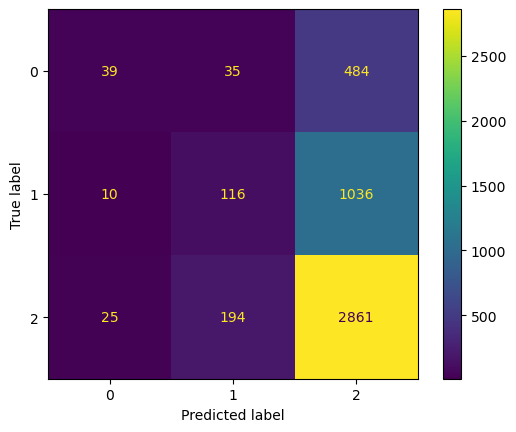

In [101]:
ConfusionMatrixDisplay.from_predictions(y_test_LE, y_pred)
plt.show()

----------------------------------

## Analysis

### Important features on best model: LogisticRegression

In [102]:
model_LogRegression.coef_.shape

(3, 131)

In [103]:
model_LogRegression.coef_

array([[-2.64196757e-02, -3.10232022e-02, -3.46859089e-03,
        -6.43136567e-02,  1.04575792e-02, -1.43709482e-01,
        -4.09746708e-01,  2.35608715e-01, -1.50080803e-02,
         3.75658931e-03, -2.28442189e-01, -1.72240393e-01,
        -2.89006965e-02, -3.75009347e-02, -2.70551134e-02,
        -9.65879472e-03, -2.22819064e-02, -4.97189478e-02,
        -1.01842222e-01, -2.25466786e-01,  5.94173105e-03,
         7.07463979e-02, -5.05270924e-02, -2.87429682e-03,
        -2.87255918e-02, -5.31460222e-02, -3.35719847e-02,
        -1.74683546e-03, -6.54683772e-02,  3.81300713e-02,
         3.70885411e-03,  1.18267917e-02, -1.84586136e-02,
         2.71677134e-02,  1.63603138e-02,  6.27424912e-04,
        -3.69817206e-02, -9.80797118e-03, -2.91628917e-03,
        -3.09546951e-02, -3.17955302e-02, -4.29825379e-02,
        -5.75559053e-02, -5.96165915e-02, -3.83669904e-02,
         3.94927737e-03, -1.75757284e-02, -6.20189751e-02,
        -3.56618531e-02,  7.40037058e-03, -2.02895832e-0

In [104]:
temp1 = encoder.get_feature_names_out()
temp2 = model_LogRegression.coef_
values = dict(zip(temp1, temp2[0]))

filtered_values = {key: value for key, value in values.items() if value > 0}

top_features = sorted(filtered_values.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

print("Top 5 Features:\n", top_features)

Top 5 Features:
 [('FIRST_CRASH_TYPE_N_PEDESTRIAN', 0.427983849623718), ('FIRST_CRASH_TYPE_N_PEDALCYCLIST', 0.3080776407727425), ('CRASH_TYPE_NO INJURY / DRIVE AWAY', 0.23560871549662993), ('MOST_SEVERE_INJURY_REPORTED, NOT EVIDENT', 0.07074639787786911), ('TRAFFICWAY_TYPE_N_PARKED', 0.05932813792274997)]


In [105]:
temp1 = encoder.get_feature_names_out()
temp2 = model_LogRegression.coef_
values = dict(zip(temp1, temp2[1]))

filtered_values = {key: value for key, value in values.items() if value > 0}

top_features = sorted(filtered_values.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

print("Top 5 Features:\n", top_features)

Top 5 Features:
 [('CRASH_TYPE_NO INJURY / DRIVE AWAY', 0.2451066255772478), ('TRAFFICWAY_TYPE_N_PARKED', 0.03866824400498985), ('WEATHER_CONDITION_N_SLEET', 0.03725892976678624), ('CRASH_HOUR_23', 0.034492293230193524), ('ROAD_DEFECT_N_DEBRIS', 0.03168842876138553)]


In [106]:
temp1 = encoder.get_feature_names_out()
temp2 = model_LogRegression.coef_
values = dict(zip(temp1, temp2[2]))

filtered_values = {key: value for key, value in values.items() if value > 0}

top_features = sorted(filtered_values.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

print("Top 5 Features:\n", top_features)

Top 5 Features:
 [('CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH', 0.39566472109823997), ('FIRST_CRASH_TYPE_N_ANGLE', 0.1881963466798827), ('MOST_SEVERE_INJURY_NO INDICATION OF INJURY', 0.13076268349218914), ('NUM_UNITS_4', 0.1260481806409697), ('NUM_UNITS_3', 0.1164500430055694)]


--------------------

### Conclusion

* The best model to use would be LogisticRegression with (C=0.01, penalty='l1', solver='saga', max_iter=10000) as the best parameters to predict whether the damage would cost less than $500 or between $500 and $1500 or higher than $1500 in the event of an accident. It had the highest accuracy score of 65% of predicting a true outcome followed by DecisionTreeClassifier with (criterion='entropy', max_depth=10, min_samples_leaf=4, min_samples_split=2) as the best parameters and an accuracy score of 64%.